In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.datasets import make_blobs
import hdbscan

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer

def plot_dbscan_outliers(dataframe, eps=0.5, min_samples=5, save_path="outliers_plot.png"):
    """
    Aplica o DBSCAN no DataFrame, normaliza os dados, imputa valores ausentes e plota os outliers.

    Parameters:
    - dataframe (pd.DataFrame): O DataFrame contendo os dados.
    - eps (float): A distância máxima entre dois pontos para serem considerados vizinhos (parâmetro DBSCAN).
    - min_samples (int): O número mínimo de pontos necessários para formar um cluster (parâmetro DBSCAN).
    - save_path (str): Caminho para salvar a imagem de saída.
    """
    # Verificar se o dataframe possui colunas suficientes para o plot
    if dataframe.shape[1] < 2:
        raise ValueError("O DataFrame deve ter pelo menos duas colunas para plotar.")
    
    # Remover a coluna 'diagnostico' se existir no DataFrame
    if 'diagnostico' in dataframe.columns:
        dataframe = dataframe.drop('diagnostico', axis=1)
    
    # Imputar valores ausentes com a média da coluna
    imputer = SimpleImputer(strategy='mean')
    imputed_data = imputer.fit_transform(dataframe)
    
    # Normalizar os dados
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(imputed_data)
    
    # Redução dimensional para 2D com PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(normalized_data)
    
    # Criar um novo DataFrame com os dados reduzidos
    reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    
    # Aplicar DBSCAN ao DataFrame reduzido
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    reduced_df['cluster'] = dbscan.fit_predict(reduced_df)
    
    # Identificar os outliers (rotulados como -1)
    outliers = reduced_df[reduced_df['cluster'] == -1]

    # Plote os resultados
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='cluster', palette='Set1', legend=None)

    # Realçar os outliers em vermelho
    plt.scatter(outliers['PC1'], outliers['PC2'], color='red', label='Outliers')
    
    plt.title('DBSCAN Outliers Detection with Normalization and PCA')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

# Exemplo de uso:
# df = pd.read_csv('seus_dados.csv')
# plot_dbscan_outliers(df)


/home/grad/ccomp/23/matias.joao/miniconda3/envs/uti/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


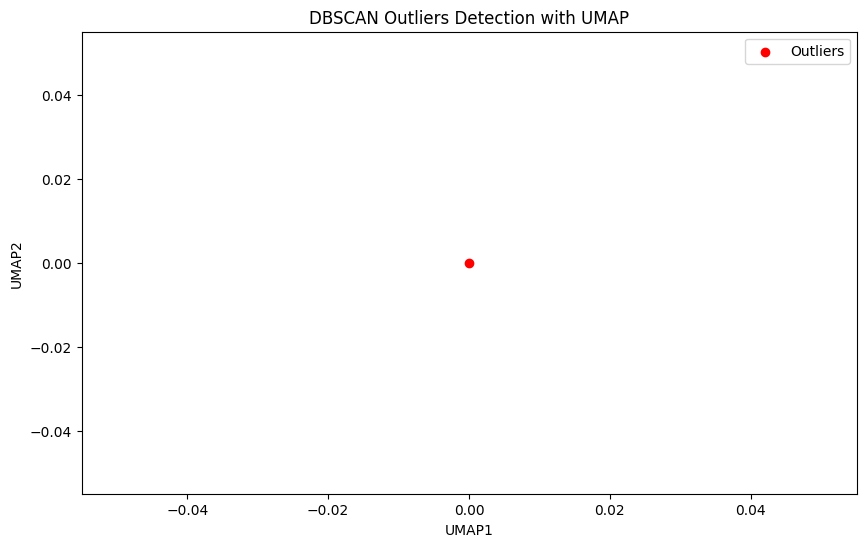

In [25]:

df = pd.read_csv('df_final.csv')
plot_dbscan_outliers(df)